<h2>Блокирующие объекты фиксированного размера</h2>

Для начала, получим формулу площади блокировки (в лекциях не нашел), пусть:    
- $r$ - расстояние от приёмника до базовой станции
- $h_r$ - высота приёмника
- $h_m$ - высота блокировки
- $h_t$ - высота станции

$tg = (h_t - h_r) / r$ 

тангенс угла линии прямой видимости к горизонтали, при условии, что выполняется: $h_r < h_m < h_t$

Для начала, пусть радиус блокировки = 0, т.е. блокировка - вертикальная прямая. Тогда блокировка может перекрыть линию прямой видимости, если блокировка находится непосредственно на линии прямой видимости и высота блокировки позволяет перекрыть линию видимости. Пусть блокировка может перекрыть линию прямой видимости, если она находится на последней, на расстоянии от приёмника в:

$r_b = (h_m - h_r) / tg$ - назовём это отрезком блокировки

Далее, учитывая радиус блокировки, линия прямой связи может быть заблокирована, при условии, что центр блокировки находится на расстоянии +- $d_m / 2$ - радиуса блокировки от отрезка блокировки, тогда получаем прямоугольник:

$S_{rect} = d_m \cdot r \cdot \frac{h_m - h_r}{h_t - h_r}$

Помимо этого у нас осталась полусфера, на конце отрезка блокировки, радиусом радиуса блокировки $d_m / 2$, внутри которого часть цилиндра всё еще блокирует линию прямой видимости.

$S_{sphere} = \frac{\pi \cdot d_m ^ 2}{8}$

Итоговая площадь:

$S = d_m \cdot r \cdot \frac{h_m - h_r}{h_t - h_r} + \frac{\pi \cdot d_m ^ 2}{8}$

Пусть приёмник находится на достаточно большом расстоянии от станции, такой, что дуга, расстояние между концами которой $d_m$ является прямой

In [26]:
import math;
import numpy as np;
import matplotlib.pyplot as plt;

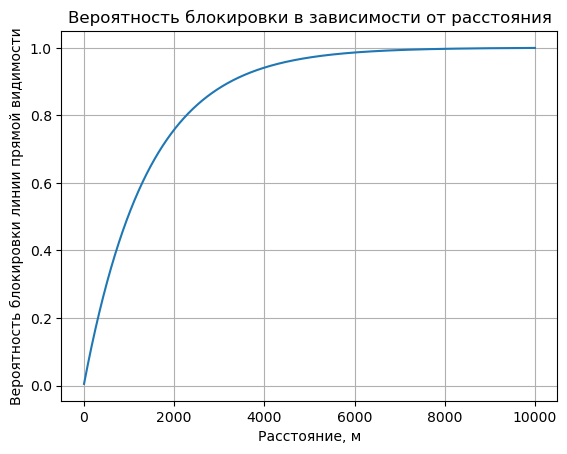

In [83]:
ht = 10;
hr = 1.5;
hm = 1.7;
dm = 0.3;
l = 0.1

Sb = lambda r, hm, ht : dm * r * max(0, (hm - hr)) / (ht - hr) + math.pi * dm ** 2 / 8;
pb = lambda r, hm, ht : 1 - math.exp( - l * Sb(r, hm, ht));

DISTANCE = np.linspace(2, 10000, 100000);
plt.plot(DISTANCE, [pb(i, hm, ht) for i in DISTANCE]);
plt.grid();
plt.title("Вероятность блокировки в зависимости от расстояния");
plt.xlabel("Расстояние, м");
plt.ylabel("Вероятность блокировки линии прямой видимости");
plt.show();

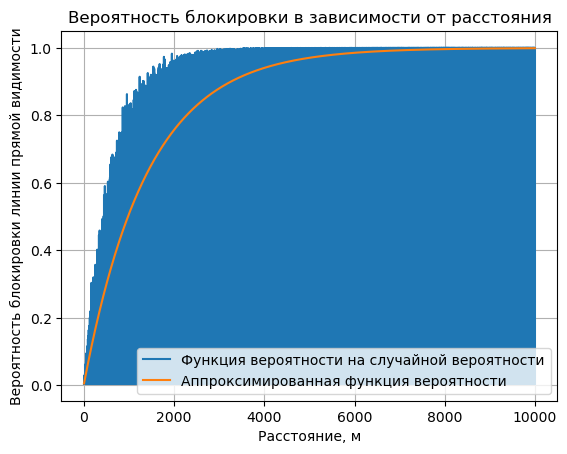

In [90]:
plt.plot(DISTANCE, [pb(i, np.random.normal(hm, 0.01), ht) for i in DISTANCE], label = "Функция вероятности на случайной вероятности");
plt.plot(DISTANCE, [pb(i, hm, ht) for i in DISTANCE], label = "Аппроксимированная функция вероятности");
plt.grid();
plt.legend();
plt.title("Вероятность блокировки в зависимости от расстояния");
plt.xlabel("Расстояние, м");
plt.ylabel("Вероятность блокировки линии прямой видимости");
plt.show();

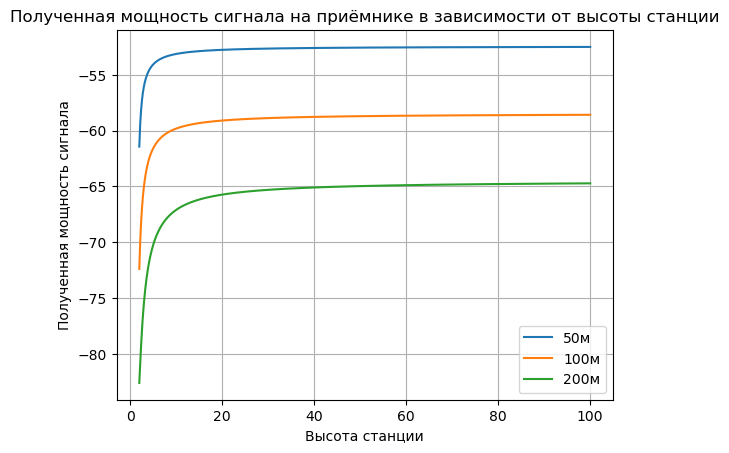

In [89]:
SPEED_OF_LIGHT = 299_792_458;
PREPARED_CONST = 20 * math.log10(4 * math.pi / SPEED_OF_LIGHT);
heights = np.linspace(2, 100, 1000);

def FSPL(r, f = 28e9):
    return PREPARED_CONST + 20 * math.log10(r * f);

def findAvgByR(r):
    return [23 + 10 + 10 - FSPL(r) - 20 * pb(r, hm, i) for i in heights];


plt.plot(heights, findAvgByR(50), label="50м");
plt.plot(heights, findAvgByR(100), label="100м");
plt.plot(heights, findAvgByR(200), label="200м");
plt.xlabel("Высота станции");
plt.ylabel("Полученная мощность сигнала");
plt.legend();
plt.grid();
plt.title("Полученная мощность сигнала на приёмнике в зависимости от высоты станции");
plt.show();